# Sprint 2: Data Preparation

### Loading data from CSV file

In [117]:
# import og nesecery libraries

import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [118]:
# i have found gold data 1980 till now. i will try to read the excel file and use it for further investigation

# Indlæs Excel-filen
#gold = pd.read_excel('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/XAU_USD Historical Data.xlsx')

# Da hele dataen er i én kolonne, kan vi dele den første kolonne baseret på kommaer
#gold_split = gold['Date,"Price","Open","High","Low","Vol.","Change %"'].str.split('"', expand=True)

#gold_split = gold_split.drop([2, 4, 6, 8, 10, 9, 12], axis=1)

#gold_split.columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Change %']


# Antag at 'gold' allerede er din DataFrame
# Først fjerner vi eventuelle kommaer og anførselstegn fra tallene og konverterer til float
#gold_split['Price'] = gold_split['Price'].str.replace(',', '').astype(float)
#gold_split['Open'] = gold_split['Open'].str.replace(',', '').astype(float)
#gold_split['High'] = gold_split['High'].str.replace(',', '').astype(float)
#gold_split['Low'] = gold_split['Low'].str.replace(',', '').astype(float)
#gold_split['Change %'] = gold_split['Change %'].str.replace('%', '').astype(float)
#gold_split['Date'] = gold_split['Date'].str.replace(',', '')

# Konverter 'Date' kolonnen til datetime
#gold_split['Date'] = pd.to_datetime(gold_split['Date'], format='%m/%d/%Y')


#gold_split.head()

# Gemmer den rensede DataFrame til en CSV-fil
#gold_split.to_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/cleaned_gold_data.csv', index=False)


In [119]:
df_gold = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/cleaned_gold_data.csv')

df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11604 entries, 0 to 11603
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11604 non-null  object 
 1   Price     11604 non-null  float64
 2   Open      11604 non-null  float64
 3   High      11604 non-null  float64
 4   Low       11604 non-null  float64
 5   Change %  11604 non-null  float64
dtypes: float64(5), object(1)
memory usage: 544.1+ KB


In [120]:
start_date = "1962-01-02"
end_date = "2024-09-12"

In [121]:
# merged dataset consists of stock, inflation and interest

df = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/merged data sets.csv', index_col=0)

In [122]:
# Consumer Price Index (CPI)

cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)
cpi = cpi.ffill().reset_index()

cpi.info

<bound method DataFrame.info of           DATE  CPIAUCSL
0   1962-02-01    30.110
1   1962-03-01    30.170
2   1962-04-01    30.210
3   1962-05-01    30.240
4   1962-06-01    30.210
..         ...       ...
746 2024-04-01   313.207
747 2024-05-01   313.225
748 2024-06-01   313.049
749 2024-07-01   313.534
750 2024-08-01   314.121

[751 rows x 2 columns]>

In [123]:
#Unemployment Rate
unemployment_rate = pdr.get_data_fred('UNRATE', start=start_date, end=end_date)
unemployment_rate = unemployment_rate.ffill().reset_index()

In [124]:
#Gross Domestic Product (GDP)
gdp = pdr.get_data_fred('GDP', start=start_date, end=end_date)
gdp = gdp.ffill().reset_index()

In [125]:
gdp

,DATE,GDP
0,1962-04-01,600.366
1,1962-07-01,609.027
2,1962-10-01,612.280
3,1963-01-01,621.672
4,1963-04-01,629.752
...,...,...
244,2023-04-01,27453.815
245,2023-07-01,27967.697
246,2023-10-01,28296.967
247,2024-01-01,28624.069


In [126]:
df['CPI'] = cpi['CPIAUCSL']
df['Unemployment Rate'] = unemployment_rate['UNRATE']
#df['GDP'] = gdp['GDP']

In [127]:
gdp

,DATE,GDP
0,1962-04-01,600.366
1,1962-07-01,609.027
2,1962-10-01,612.280
3,1963-01-01,621.672
4,1963-04-01,629.752
...,...,...
244,2023-04-01,27453.815
245,2023-07-01,27967.697
246,2023-10-01,28296.967
247,2024-01-01,28624.069


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 0 to 807
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          808 non-null    object 
 1   Open                          808 non-null    float64
 2   High                          808 non-null    float64
 3   Low                           808 non-null    float64
 4   Close                         808 non-null    float64
 5   Adj Close                     808 non-null    float64
 6   Volume                        808 non-null    float64
 7   Effective Federal Funds Rate  808 non-null    float64
 8   Inflation Rate                808 non-null    float64
 9   CPI                           751 non-null    float64
 10  Unemployment Rate             751 non-null    float64
dtypes: float64(10), object(1)
memory usage: 75.8+ KB


In [129]:
df = df.ffill()

In [130]:
merged_data = df.copy()

In [131]:
merged_data['CPI'] = cpi['CPIAUCSL']
merged_data['Unemployment Rate'] = unemployment_rate['UNRATE']
#merged_data['GDP'] = gdp['GDP'] --> missing a lot of data and has a correlation value of ,48

merged_data.ffill()

,Date,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate
0,1962-01-01,0.000000,3.553512,3.448997,3.475125,0.570977,254509.0,2.15,1.3,30.110,5.5
1,1962-02-01,0.000000,3.573108,3.435932,3.553512,0.583857,319571.0,2.37,1.3,30.170,5.6
2,1962-03-01,0.000000,3.520851,3.448997,3.475125,0.572706,139693.0,2.85,1.6,30.210,5.6
3,1962-04-01,0.000000,3.651495,3.625366,3.644962,0.600695,116730.0,2.78,1.3,30.240,5.5
4,1962-05-01,0.000000,3.422868,3.292224,3.403271,0.560864,359757.0,2.36,1.6,30.210,5.5
...,...,...,...,...,...,...,...,...,...,...,...
803,2016-07-01,146.438126,147.224075,146.245819,146.772568,109.611809,2309356.0,0.39,2.2,314.121,4.2
804,2016-08-01,148.060196,149.280930,148.060196,149.071899,111.328987,1911686.0,0.40,2.3,314.121,4.2
805,2016-09-01,149.924744,150.643814,149.498322,150.484955,113.084549,1309979.0,0.40,2.2,314.121,4.2
806,2016-10-01,146.596985,147.115387,145.819397,146.354507,109.980614,2135578.0,0.40,2.1,314.121,4.2


In [132]:
merged_data.bfill()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 0 to 807
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          808 non-null    object 
 1   Open                          808 non-null    float64
 2   High                          808 non-null    float64
 3   Low                           808 non-null    float64
 4   Close                         808 non-null    float64
 5   Adj Close                     808 non-null    float64
 6   Volume                        808 non-null    float64
 7   Effective Federal Funds Rate  808 non-null    float64
 8   Inflation Rate                808 non-null    float64
 9   CPI                           751 non-null    float64
 10  Unemployment Rate             751 non-null    float64
dtypes: float64(10), object(1)
memory usage: 75.8+ KB


<Axes: xlabel='Date'>

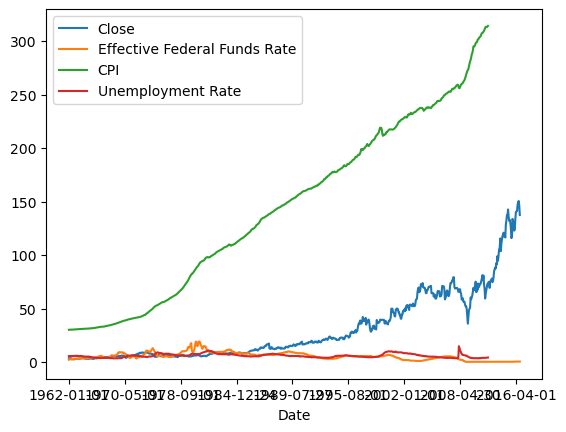

In [133]:
merged_data.plot.line(y=['Close', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate'] , x='Date')

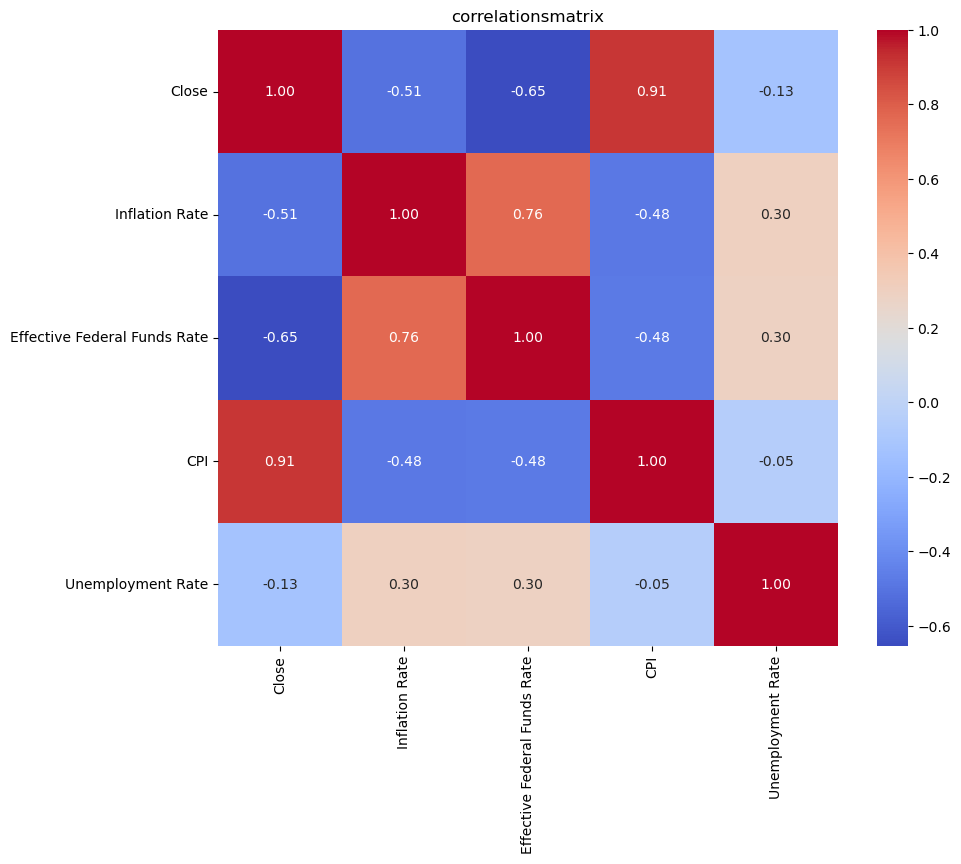

In [134]:
#Beregn korrelation
correlation_matrix = merged_data[['Close', 'Inflation Rate', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## Now normalizing the data set to see if it makes any difference

In [135]:
correlation_matrix

,Close,Inflation Rate,Effective Federal Funds Rate,CPI,Unemployment Rate
Close,1.000000,-0.509448,-0.653870,0.909794,-0.129796
Inflation Rate,-0.509448,1.000000,0.762431,-0.479789,0.299347
Effective Federal Funds Rate,-0.653870,0.762431,1.000000,-0.479163,0.295569
CPI,0.909794,-0.479789,-0.479163,1.000000,-0.050652
Unemployment Rate,-0.129796,0.299347,0.295569,-0.050652,1.000000


In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
# Laver en kopi af DataFrame uden dato kolonnen (som ikke skal normaliseres)
df_no_date = merged_data.drop(columns=['Date'])

# Initialiserer MinMaxScaler
scaler = MinMaxScaler()

# Anvender skaleringen på dataene
df_scaled = scaler.fit_transform(df_no_date)

# Konverterer tilbage til en DataFrame med de samme kolonnenavne
df_scaled = pd.DataFrame(df_scaled, columns=df_no_date.columns)

# Tilføj dato kolonnen tilbage
# df_scaled['Date'] = df['Date']

df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate
0,0.0,0.006924,0.006841,0.006840,0.001452,0.013576,0.109301,0.053846,0.000000,0.184211
1,0.0,0.007056,0.006752,0.007370,0.001566,0.018286,0.120862,0.053846,0.000211,0.192982
2,0.0,0.006703,0.006841,0.006840,0.001468,0.005264,0.146085,0.076923,0.000352,0.192982
3,0.0,0.007586,0.008040,0.007987,0.001716,0.003602,0.142407,0.053846,0.000458,0.184211
4,0.0,0.006042,0.005775,0.006355,0.001362,0.021196,0.120336,0.076923,0.000352,0.184211


In [138]:
df_scaled_with_date = df_scaled.copy()

df_scaled_with_date['Date'] = df['Date']

df_scaled_with_date

,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate,Date
0,0.000000,0.006924,0.006841,0.006840,0.001452,0.013576,0.109301,0.053846,0.000000,0.184211,1962-01-01
1,0.000000,0.007056,0.006752,0.007370,0.001566,0.018286,0.120862,0.053846,0.000211,0.192982,1962-02-01
2,0.000000,0.006703,0.006841,0.006840,0.001468,0.005264,0.146085,0.076923,0.000352,0.192982,1962-03-01
3,0.000000,0.007586,0.008040,0.007987,0.001716,0.003602,0.142407,0.053846,0.000458,0.184211,1962-04-01
4,0.000000,0.006042,0.005775,0.006355,0.001362,0.021196,0.120336,0.076923,0.000352,0.184211,1962-05-01
...,...,...,...,...,...,...,...,...,...,...,...
803,0.976744,0.976912,0.977882,0.974920,0.969180,0.162335,0.016816,0.123077,NaN,NaN,2016-07-01
804,0.987563,0.990799,0.990221,0.990454,0.984420,0.133546,0.017341,0.130769,NaN,NaN,2016-08-01
805,1.000000,1.000000,1.000000,1.000000,1.000000,0.089986,0.017341,0.123077,NaN,NaN,2016-09-01
806,0.977804,0.976178,0.974983,0.972096,0.972453,0.149754,0.017341,0.115385,NaN,NaN,2016-10-01


<Axes: xlabel='Date'>

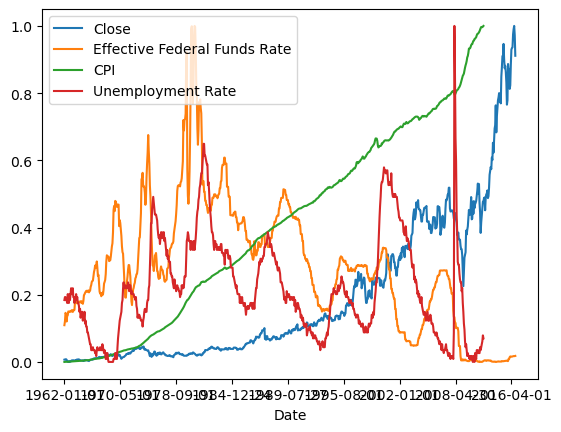

In [139]:
df_scaled_with_date.plot.line(y=['Close', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate'] , x='Date')

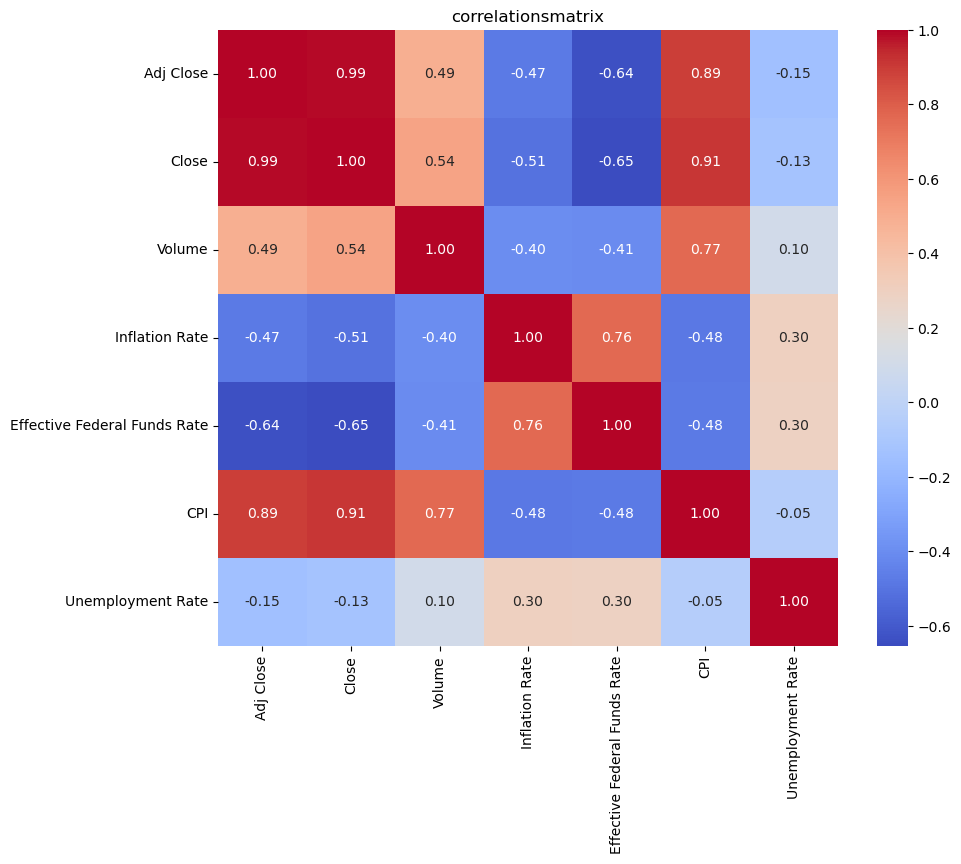

In [140]:
#Beregn korrelation
correlation_matrix_normalization = df_scaled[['Adj Close', 'Close', 'Volume', 'Inflation Rate', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_normalization, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

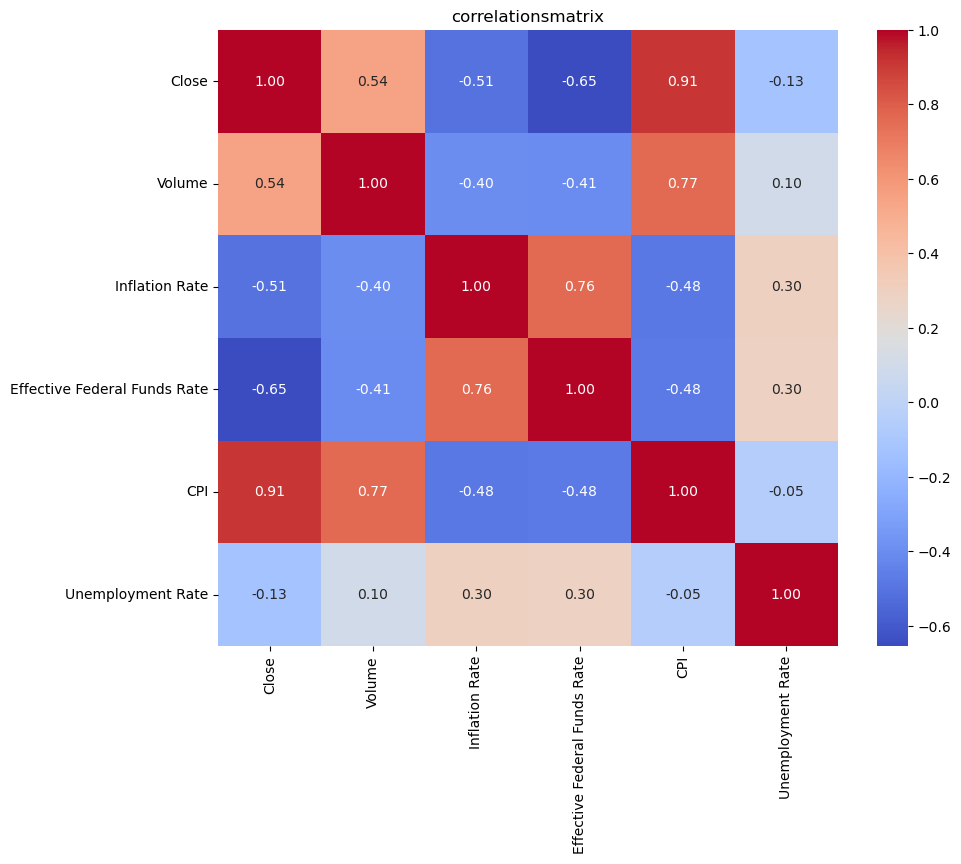

In [141]:
#Beregn korrelation
df_normalized = df_scaled[['Close', 'Volume', 'Inflation Rate', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_normalized, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## Feature Engineering
Skaber nye variabler baseret på data jeg har. Jeg starter med at kigge ind i den procentvise ændring for renter, inflation, closing price, CPI, 

In [142]:
df_feature_engineering = df.copy()

In [143]:
df_feature_engineering

,Date,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate
0,1962-01-01,0.000000,3.553512,3.448997,3.475125,0.570977,254509.0,2.15,1.3,30.110,5.5
1,1962-02-01,0.000000,3.573108,3.435932,3.553512,0.583857,319571.0,2.37,1.3,30.170,5.6
2,1962-03-01,0.000000,3.520851,3.448997,3.475125,0.572706,139693.0,2.85,1.6,30.210,5.6
3,1962-04-01,0.000000,3.651495,3.625366,3.644962,0.600695,116730.0,2.78,1.3,30.240,5.5
4,1962-05-01,0.000000,3.422868,3.292224,3.403271,0.560864,359757.0,2.36,1.6,30.210,5.5
...,...,...,...,...,...,...,...,...,...,...,...
803,2016-07-01,146.438126,147.224075,146.245819,146.772568,109.611809,2309356.0,0.39,2.2,314.121,4.2
804,2016-08-01,148.060196,149.280930,148.060196,149.071899,111.328987,1911686.0,0.40,2.3,314.121,4.2
805,2016-09-01,149.924744,150.643814,149.498322,150.484955,113.084549,1309979.0,0.40,2.2,314.121,4.2
806,2016-10-01,146.596985,147.115387,145.819397,146.354507,109.980614,2135578.0,0.40,2.1,314.121,4.2


In [144]:
df_feature_engineering['Price Change %'] = df['Close'].pct_change()
df_feature_engineering['Inflation Change %'] = df['Inflation Rate'].pct_change()
df_feature_engineering['Interest Change %'] = df['Effective Federal Funds Rate'].pct_change()
df_feature_engineering['CPI Change %'] = df['CPI'].pct_change()
df_feature_engineering['Unemployment Rate Change %'] = df['Unemployment Rate'].pct_change()

In [145]:
df_feature_engineering.bfill()

,Date,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate,Price Change %,Inflation Change %,Interest Change %,CPI Change %,Unemployment Rate Change %
0,1962-01-01,0.000000,3.553512,3.448997,3.475125,0.570977,254509.0,2.15,1.3,30.110,5.5,0.022557,0.000000,0.102326,0.001993,0.018182
1,1962-02-01,0.000000,3.573108,3.435932,3.553512,0.583857,319571.0,2.37,1.3,30.170,5.6,0.022557,0.000000,0.102326,0.001993,0.018182
2,1962-03-01,0.000000,3.520851,3.448997,3.475125,0.572706,139693.0,2.85,1.6,30.210,5.6,-0.022059,0.230769,0.202532,0.001326,0.000000
3,1962-04-01,0.000000,3.651495,3.625366,3.644962,0.600695,116730.0,2.78,1.3,30.240,5.5,0.048872,-0.187500,-0.024561,0.000993,-0.017857
4,1962-05-01,0.000000,3.422868,3.292224,3.403271,0.560864,359757.0,2.36,1.6,30.210,5.5,-0.066308,0.230769,-0.151079,-0.000992,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2016-07-01,146.438126,147.224075,146.245819,146.772568,109.611809,2309356.0,0.39,2.2,314.121,4.2,0.040607,0.000000,0.026316,0.000000,0.000000
804,2016-08-01,148.060196,149.280930,148.060196,149.071899,111.328987,1911686.0,0.40,2.3,314.121,4.2,0.015666,0.045455,0.025641,0.000000,0.000000
805,2016-09-01,149.924744,150.643814,149.498322,150.484955,113.084549,1309979.0,0.40,2.2,314.121,4.2,0.009479,-0.043478,0.000000,0.000000,0.000000
806,2016-10-01,146.596985,147.115387,145.819397,146.354507,109.980614,2135578.0,0.40,2.1,314.121,4.2,-0.027448,-0.045455,0.000000,0.000000,0.000000


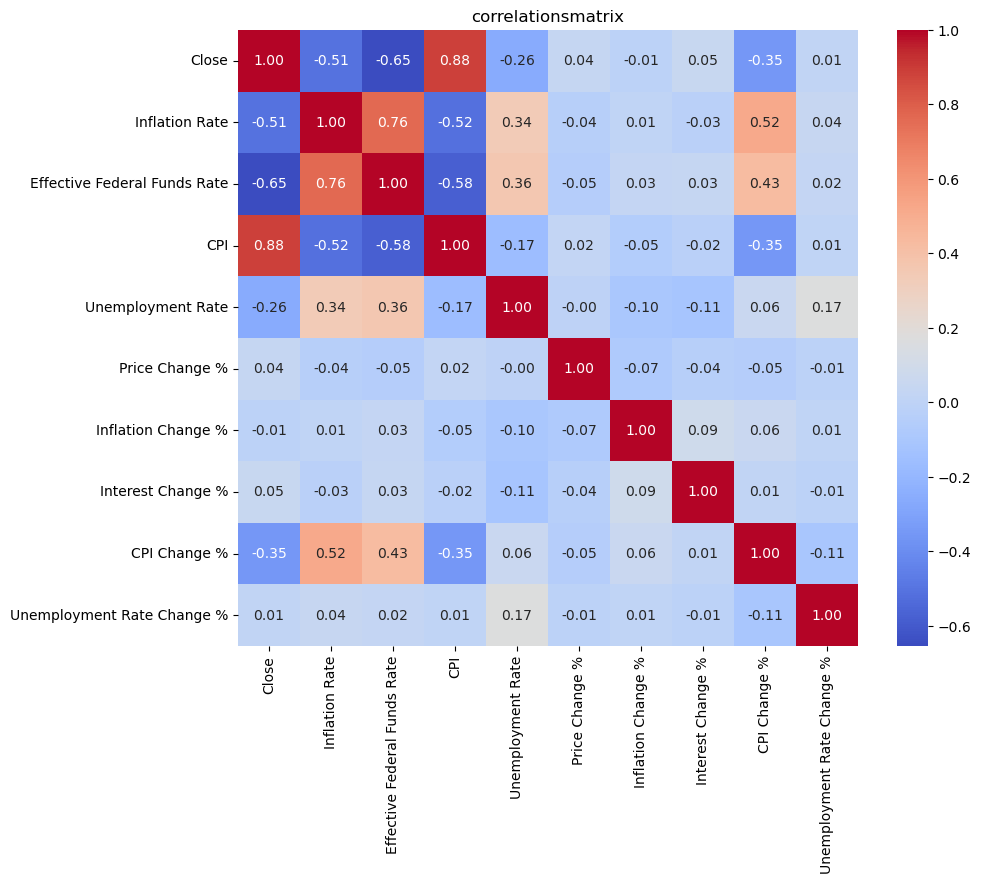

In [146]:
#Beregn korrelation
correlation_matrix_engineering = df_feature_engineering[['Close', 'Inflation Rate', 'Effective Federal Funds Rate', 'CPI', 'Unemployment Rate', 'Price Change %', 'Inflation Change %', 'Interest Change %', 'CPI Change %', 'Unemployment Rate Change %' ]].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_engineering, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

### Jeg har forsøgt at træne en model med de adskillige dataframes hvor dataframe kaldet correlation_matrix har givet en RMSE værdi på 0.26 hvilket er for højt... Nu prøver jeg at opdele settet i 5 bins baseret på 'close'

In [147]:
columns_to_keep = ['Close', 'Effective Federal Funds Rate', 'Inflation Rate', 'CPI', 'Unemployment Rate']

# Opret en ny DataFrame med de ønskede kolonner
df_bins = df_no_date[columns_to_keep].copy()

# Lav bins af close-priserne
bins = pd.cut(df_bins['Close'], bins=5, labels=False)

df_bins['Close_bins'] = bins

In [148]:
bins

0      0
1      0
2      0
3      0
4      0
      ..
803    4
804    4
805    4
806    4
807    4
Name: Close, Length: 808, dtype: int64

In [149]:
df_bins['CPI'] = df_bins['CPI'].ffill()
df_bins['Unemployment Rate'] = df_bins['Unemployment Rate'].ffill()

df_bins.info()

df_bins

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Close                         808 non-null    float64
 1   Effective Federal Funds Rate  808 non-null    float64
 2   Inflation Rate                808 non-null    float64
 3   CPI                           808 non-null    float64
 4   Unemployment Rate             808 non-null    float64
 5   Close_bins                    808 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 44.2 KB


,Close,Effective Federal Funds Rate,Inflation Rate,CPI,Unemployment Rate,Close_bins
0,3.475125,2.15,1.3,30.110,5.5,0
1,3.553512,2.37,1.3,30.170,5.6,0
2,3.475125,2.85,1.6,30.210,5.6,0
3,3.644962,2.78,1.3,30.240,5.5,0
4,3.403271,2.36,1.6,30.210,5.5,0
...,...,...,...,...,...,...
803,146.772568,0.39,2.2,314.121,4.2,4
804,149.071899,0.40,2.3,314.121,4.2,4
805,150.484955,0.40,2.2,314.121,4.2,4
806,146.354507,0.40,2.1,314.121,4.2,4


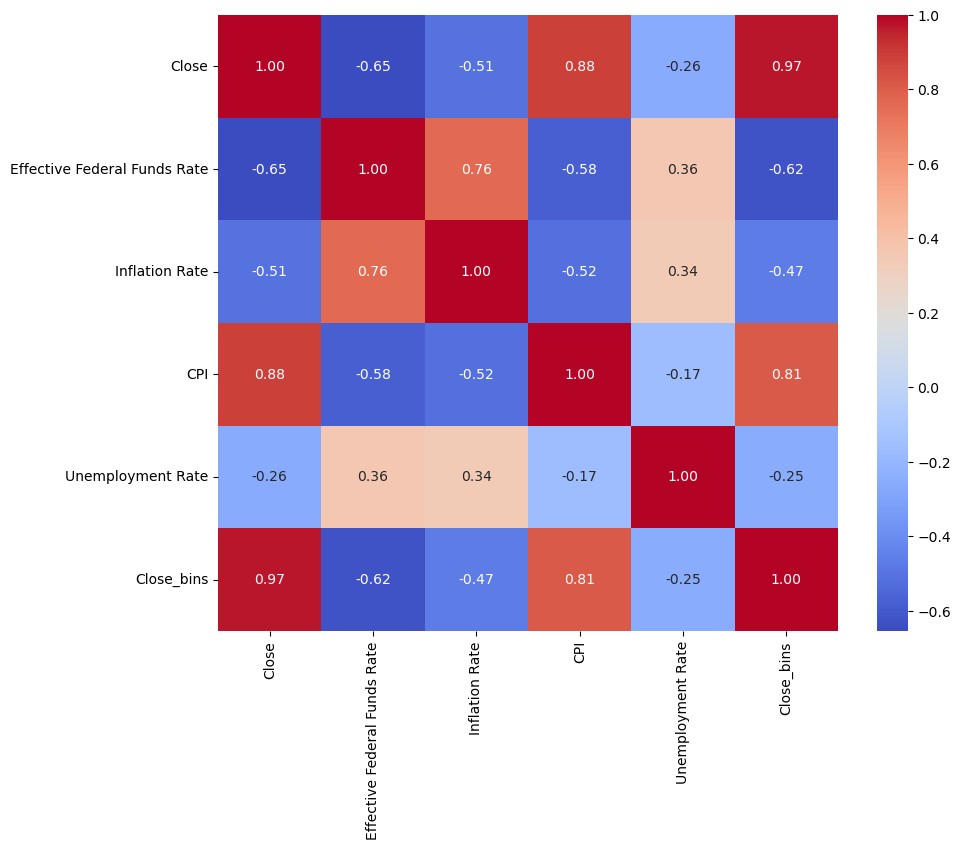

In [150]:
# beregner correlation
corrmatt_bins = df_bins.corr()

# Visualiser korrelationsmatrixen
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatt_bins, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Jeg har forsøgt at træne en model med de adskillige dataframes med bedste RMSE værdi på 0.26 hvilket er for højt... Nu prøver jeg at opdele settet i 5 bins baseret på 'close'

In [151]:
# 'Close' er target variabel og resten er features
X = df_bins.drop(['Close', 'Unemployment Rate',], axis=1)  # Features
y = df_bins['Close']  # Target (Close prisen)

# Split data til træning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Opret polynomial features
poly = PolynomialFeatures(degree=2)  # Prøv grad 2 for en start
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [153]:
# Træn den lineære regression model på de polynomiske funktioner
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [154]:
# Forudsigelser
y_pred = model.predict(X_test_poly)

# Evaluer modelens præstation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

# Beregning af R²
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Root Mean Squared Error: 3.991160209349102
R-squared: 0.9841058469101752


### Forsøger at sammenligne de predicted værdier med testværdierne

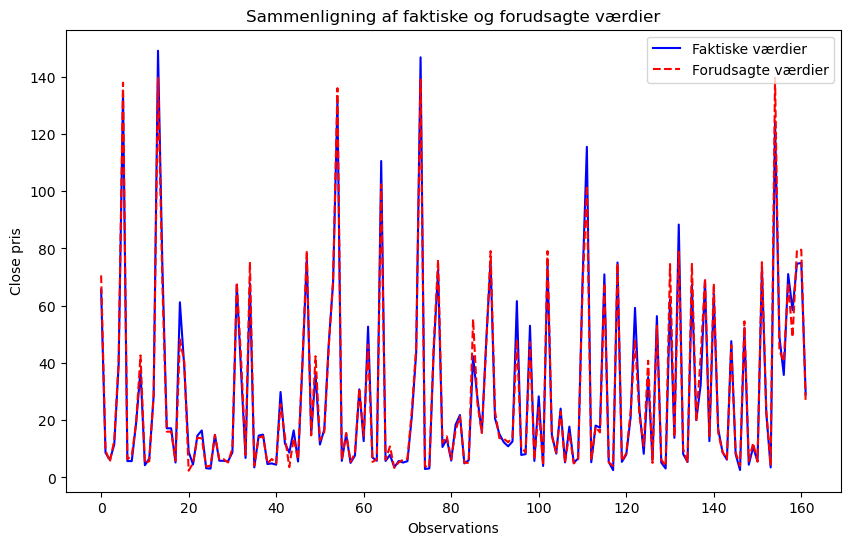

In [155]:
# Lav en graf der sammenligner faktiske værdier med forudsigelser
plt.figure(figsize=(10, 6))

# Plot de faktiske værdier (y_test)
plt.plot(y_test.values, label='Faktiske værdier', color='blue')

# Plot de forudsagte værdier (y_pred)
plt.plot(y_pred, label='Forudsagte værdier', color='red', linestyle='dashed')

# Tilføj labels og titel
plt.title('Sammenligning af faktiske og forudsagte værdier')
plt.xlabel('Observations')
plt.ylabel('Close pris')
plt.legend()

# Vis grafen
plt.show()

      Close  Predicted_Close
0  3.475125         4.318758
1  3.553512         4.242710
2  3.475125         4.229526
3  3.644962         4.088561
4  3.403271         4.404776


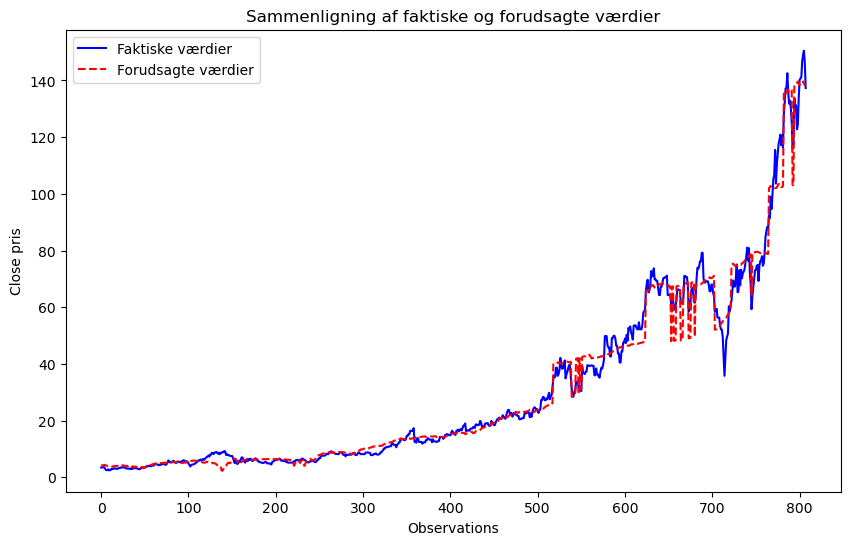

In [156]:
# Forudsigelser for hele datasættet
X_poly_full = poly.transform(X)  # Opret polynomiske features for hele datasættet
y_pred_full = model.predict(X_poly_full)  # Forudsig for hele datasættet

# Opret et nyt datasæt med forudsigelser
df_predictions = df_bins.copy()  # Kopier den oprindelige DataFrame
df_predictions['Predicted_Close'] = y_pred_full  # Tilføj forudsigelser til DataFrame

# Vis de første rækker af det nye datasæt
print(df_predictions[['Close', 'Predicted_Close']].head())

# Lav en graf der sammenligner faktiske værdier med forudsigelser
plt.figure(figsize=(10, 6))

# Plot de faktiske værdier
plt.plot(df_predictions['Close'], label='Faktiske værdier', color='blue')
plt.plot(df_predictions['Predicted_Close'], label='Forudsagte værdier', color='red', linestyle='dashed')

# Tilføj labels og titel
plt.title('Sammenligning af faktiske og forudsagte værdier')
plt.xlabel('Observations')
plt.ylabel('Close pris')
plt.legend()

# Vis grafen
plt.show()